#Denoising Dirty Documents Kaggle

## Import Libraries

In [0]:
import os
import glob

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2

from keras.preprocessing import image
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout, UpSampling2D

Using TensorFlow backend.


In [0]:
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
ls


drive/  sample_data/


In [0]:
cd drive


/content/drive


In [0]:
cd Img_den

[Errno 2] No such file or directory: 'Img_den'
/content/drive


In [0]:
ls

'My Drive'/


In [0]:
cd My Drive

/content/drive/My Drive


In [0]:
ls

'04-08-17 2017 time table batch 2016 and 2017.gsheet'
 altPro.tar.gz
'ans qu.txt.gdoc'
 ans.rtf.gdoc
 Assignment6/
 Beginner/
 bleh.tar.gz
'BLPD 2018 - Standing.xlsx'
 cb/
 Codes204/
'Colab Notebooks'/
'Condolence Meeting_Mr.Narinderpal Singh .tif'
'Consent and the case of equality.gslides'
'Coupled Pendulum.pdf'
'Cryptex (1).txt.gdoc'
 Cryptex.txt.gdoc
 Debate.gsheet
 DebSoc/
 Dhillon_Hersh_Resume_2019-01-31.pdf
 Discrete_and_Combinatorial_Mathematics_5th_ed_-_R._Grimaldi.pdf
 ds/
 easy_one.cpp
 Engineering_Circuit_Analysis_Hayt_8th.pdf
'EXTEMPORE SHEET.xlsx'
'Facebook Data Challenge answers.gdoc'
 flipchal/
 Follow.gdoc
'Freshers Tournament.gsheet'
'Gd sp.gsheet'
'Hasya Kavita.gsheet'
'Helmholtz Coils.pdf'
'IBCC Lit.gsheet'
 Image-Object-Localization/
 ImgClassifier/
 Img_den/
'Inter IIT security.gsheet'
 Lab1_2017csb1079.gdoc
'Lab-2 2017csb1079.gdoc'
 Lab3_2017csb1079/
 Lab3_2017csb1079.tar.gz
 Lab3and4.gdoc
 lab3.a.tar.gz
 lab3.b.tar.gz
 Lab4_2017csb1079/
 Lab4_2017csb1079.tar.gz
'

In [0]:
cd Img_den

/content/drive/My Drive/Img_den


(420, 540)


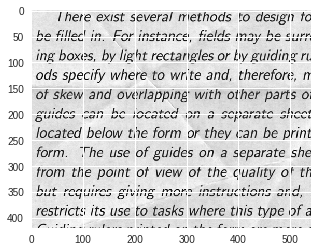

In [0]:
plt.figure()
img = cv2.imread('./train/101.png', 0)
plt.imshow(img, cmap='gray')
print(img.shape)

In [0]:
TRAIN_IMAGES = glob.glob('./train/*.png')
CLEAN_IMAGES = glob.glob('./train_cleaned/*.png')
TEST_IMAGES = glob.glob('./test/*.png')

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
def load_image(path):
  image_list = np.zeros((len(path), 420, 540, 1))
  for i, fig, in enumerate(path):
    img = image.load_img(fig, color_mode='grayscale', target_size=(420, 540))
    x = image.img_to_array(img).astype('float32')
    
    x = x / 255.0
    image_list[i] = x
    
  return image_list

In [0]:
x_train = load_image(TRAIN_IMAGES)
y_train = load_image(CLEAN_IMAGES)
x_test = load_image(TEST_IMAGES)

print(x_train.shape, x_test.shape, y_train.shape)

(144, 420, 540, 1) (72, 420, 540, 1) (144, 420, 540, 1)


In [0]:
def train_val_split(x_train, y_train):
    rnd = np.random.RandomState(seed=101)
    perm = rnd.permutation(len(x_train))
    train_idx = perm[:int(0.8 * len(x_train))]
    val_idx = perm[int(0.8 * len(x_train)):]
    return x_train[train_idx], y_train[train_idx], x_train[val_idx], y_train[val_idx]

x_train, y_train, x_val, y_val = train_val_split(x_train, y_train)
print(x_train.shape, x_val.shape)

(115, 420, 540, 1) (29, 420, 540, 1)


In [0]:
img_shape = (420, 540, 1)
optimizer = Adam(lr=0.001)

Instructions for updating:
Colocations handled automatically by placer.


##MODEL

In [0]:
input_layer = Input(shape = img_shape)
x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(input_layer)
x = MaxPooling2D((2,2), padding = 'same')(x)

x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D((2, 2))(x)
output_layer = Conv2D(1,(3,3), activation='sigmoid', padding = 'same')(x)

In [0]:
autoencoder = Model(input_layer, output_layer)

In [0]:
autoencoder.compile(loss = 'mse', optimizer='Adam')

In [0]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 420, 540, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 420, 540, 64)      640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 210, 270, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 210, 270, 64)      36928     
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 420, 540, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 420, 540, 1)       577       
Total params: 38,145
Trainable params: 38,145
Non-trainable params: 0
_________________________________________________________________


In [0]:
early_stopping = EarlyStopping(monitor='val_loss',
                                       min_delta=0,
                                       patience=5,
                                       verbose=1, 
                                       mode='auto')

In [0]:
batch_size = 16
epochs = 100

In [0]:
autoencoder.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data=(x_val, y_val),
                callbacks=[early_stopping])

Instructions for updating:
Use tf.cast instead.
Train on 115 samples, validate on 29 samples
Epoch 1/100
115/115 [==============================] - 12s 107ms/step - loss: 0.1516 - val_loss: 0.0717
Epoch 2/100
115/115 [==============================] - 4s 35ms/step - loss: 0.0735 - val_loss: 0.0773
Epoch 3/100
115/115 [==============================] - 4s 35ms/step - loss: 0.0786 - val_loss: 0.0780
Epoch 4/100
115/115 [==============================] - 4s 35ms/step - loss: 0.0776 - val_loss: 0.0744
Epoch 5/100
115/115 [==============================] - 4s 35ms/step - loss: 0.0724 - val_loss: 0.0683
Epoch 6/100
115/115 [==============================] - 4s 35ms/step - loss: 0.0692 - val_loss: 0.0676
Epoch 7/100
115/115 [==============================] - 4s 35ms/step - loss: 0.0675 - val_loss: 0.0656
Epoch 8/100
115/115 [==============================] - 4s 35ms/step - loss: 0.0660 - val_loss: 0.0635
Epoch 9/100
115/115 [==============================] - 4s 35ms/step - loss: 0.0642 - val_

In [0]:
preds = autoencoder.predict(x_test)

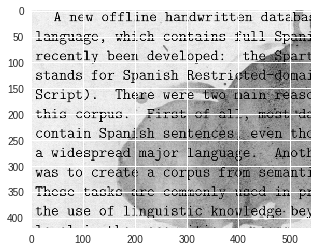

In [0]:
preds_0 = preds[10] * 255.0
preds_0 = preds_0.reshape(420, 540)
x_test_0 = x_test[10] * 255.0
x_test_0 = x_test_0.reshape(420, 540)
plt.imshow(x_test_0, cmap='gray')

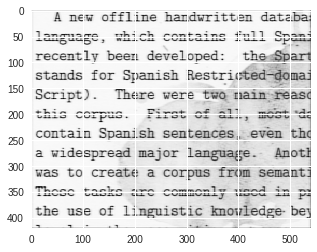

In [0]:
plt.imshow(preds_0, cmap='gray')

In [0]:
preds = preds.reshape(-1, 420, 540)

In [0]:
ids = []
vals = []
for i, f in enumerate(TEST_IMAGES):
    file = os.path.basename(f)
    imgid = int(file[:-4])
    test_img = cv2.imread(f, 0)
    img_shape = test_img.shape
    print('processing: {}'.format(imgid))
    print(img_shape)
    preds_reshaped = cv2.resize(preds[i], (img_shape[1], img_shape[0]))
    for r in range(img_shape[0]):
        for c in range(img_shape[1]):
            ids.append(str(imgid)+'_'+str(r + 1)+'_'+str(c + 1))
            vals.append(preds_reshaped[r, c])

print('Writing to csv file')
pd.DataFrame({'id': ids, 'value': vals}).to_csv('submission.csv', index=False)

processing: 1
(258, 540)
processing: 103
(420, 540)
processing: 10
(258, 540)
processing: 106
(420, 540)
processing: 100
(420, 540)
processing: 112
(420, 540)
processing: 118
(420, 540)
processing: 121
(420, 540)
processing: 109
(420, 540)
processing: 115
(420, 540)
processing: 133
(420, 540)
processing: 148
(420, 540)
processing: 139
(420, 540)
processing: 142
(420, 540)
processing: 145
(420, 540)
processing: 136
(420, 540)
processing: 124
(420, 540)
processing: 13
(258, 540)
processing: 130
(420, 540)
processing: 127
(420, 540)
processing: 151
(420, 540)
processing: 154
(420, 540)
processing: 166
(420, 540)
processing: 169
(420, 540)
processing: 157
(420, 540)
processing: 163
(420, 540)
processing: 160
(420, 540)
processing: 16
(258, 540)
processing: 175
(420, 540)
processing: 172
(420, 540)
processing: 178
(420, 540)
processing: 187
(420, 540)
processing: 181
(420, 540)
processing: 184
(420, 540)
processing: 190
(420, 540)
processing: 193
(420, 540)
processing: 202
(420, 540)
proces